In [90]:
#IMPORTING NECESSARY LIBRARY PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,silhouette_score,mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
#from imblearn.sampling import SMOTE
import tensorflow
import keras
from tensorflow.keras import callbacks,optimizers,Input,models

In [91]:
#IMPORTING THE DATA
df=pd.read_csv("C:\\Users\\trigo\\Downloads\\train.csv (1)\\flooddata.csv")
df

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,3,3,4,10,4,5,5,7,10,...,7,8,7,2,2,1,4,6,4,0.495
1117953,1117953,2,2,4,3,9,5,8,1,3,...,9,4,4,3,7,4,9,4,5,0.480
1117954,1117954,7,3,9,4,6,5,9,1,3,...,5,5,5,5,6,5,5,2,4,0.485
1117955,1117955,7,3,3,7,5,2,3,4,6,...,6,8,5,3,4,6,7,6,4,0.495


In [92]:
df.index

RangeIndex(start=0, stop=1117957, step=1)

In [93]:
df.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [94]:

df.dtypes

id                                   int64
MonsoonIntensity                     int64
TopographyDrainage                   int64
RiverManagement                      int64
Deforestation                        int64
Urbanization                         int64
ClimateChange                        int64
DamsQuality                          int64
Siltation                            int64
AgriculturalPractices                int64
Encroachments                        int64
IneffectiveDisasterPreparedness      int64
DrainageSystems                      int64
CoastalVulnerability                 int64
Landslides                           int64
Watersheds                           int64
DeterioratingInfrastructure          int64
PopulationScore                      int64
WetlandLoss                          int64
InadequatePlanning                   int64
PoliticalFactors                     int64
FloodProbability                   float64
dtype: object

In [95]:
df.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [97]:
#EXPLORATORY DATA ANALYSIS:
df.isnull().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [98]:
df["MonsoonIntensity"].unique()

array([ 5,  6,  3,  8,  4,  7,  9,  2, 10,  1,  0, 11, 12, 13, 15, 14, 16],
      dtype=int64)

In [99]:
df["TopographyDrainage"].unique()

array([ 8,  7,  5,  4,  3,  6,  2,  1,  9, 10, 12,  0, 11, 14, 13, 16, 15,
       17, 18], dtype=int64)

In [100]:
df["RiverManagement"].unique()

array([ 5,  4,  6,  2,  1,  8,  3,  0,  9,  7, 10, 11, 12, 15, 13, 14, 16],
      dtype=int64)

In [101]:
df["RiverManagement"].unique()

array([ 5,  4,  6,  2,  1,  8,  3,  0,  9,  7, 10, 11, 12, 15, 13, 14, 16],
      dtype=int64)

In [104]:
#CORRELATION MATRIX
corre=df.corr()
corre

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
id,1.000000,-0.000093,-0.001518,-0.000413,-0.000080,0.000580,-0.000188,0.000133,0.000281,-0.000103,...,0.000558,-0.001386,0.001078,0.000215,-0.000385,0.000625,0.000931,-0.001535,-0.000155,-0.000184
MonsoonIntensity,-0.000093,1.000000,-0.007362,-0.008070,-0.007251,-0.009309,-0.008031,-0.007787,-0.007836,-0.008232,...,-0.009716,-0.010659,-0.009121,-0.008900,-0.008486,-0.008679,-0.006811,-0.008155,-0.008474,0.189098
TopographyDrainage,-0.001518,-0.007362,1.000000,-0.009924,-0.008548,-0.010532,-0.009619,-0.007607,-0.009824,-0.009496,...,-0.010056,-0.012526,-0.010240,-0.011067,-0.006628,-0.010815,-0.010267,-0.011617,-0.012350,0.187635
RiverManagement,-0.000413,-0.008070,-0.009924,1.000000,-0.008574,-0.012292,-0.009237,-0.008711,-0.010058,-0.010783,...,-0.011277,-0.011680,-0.008994,-0.011412,-0.005827,-0.006727,-0.010069,-0.009673,-0.011550,0.187131
Deforestation,-0.000080,-0.007251,-0.008548,-0.008574,1.000000,-0.012248,-0.008266,-0.009356,-0.011536,-0.010039,...,-0.010490,-0.012388,-0.009257,-0.010671,-0.008862,-0.011777,-0.011004,-0.010424,-0.009661,0.184001
Urbanization,0.000580,-0.009309,-0.010532,-0.012292,-0.012248,1.000000,-0.011199,-0.011128,-0.010153,-0.010559,...,-0.012572,-0.014497,-0.010582,-0.012107,-0.010656,-0.011485,-0.011023,-0.011584,-0.013005,0.180861
ClimateChange,-0.000188,-0.008031,-0.009619,-0.009237,-0.008266,-0.011199,1.000000,-0.008427,-0.009457,-0.011517,...,-0.009650,-0.013005,-0.009352,-0.009882,-0.006324,-0.010332,-0.009376,-0.010772,-0.011379,0.184761
DamsQuality,0.000133,-0.007787,-0.007607,-0.008711,-0.009356,-0.011128,-0.008427,1.000000,-0.009401,-0.009033,...,-0.010439,-0.012096,-0.009924,-0.009085,-0.009831,-0.009599,-0.009372,-0.011374,-0.013081,0.187996
Siltation,0.000281,-0.007836,-0.009824,-0.010058,-0.011536,-0.010153,-0.009457,-0.009401,1.000000,-0.010179,...,-0.010702,-0.011762,-0.009173,-0.009457,-0.006312,-0.008739,-0.008667,-0.009079,-0.008493,0.186789
AgriculturalPractices,-0.000103,-0.008232,-0.009496,-0.010783,-0.010039,-0.010559,-0.011517,-0.009033,-0.010179,1.000000,...,-0.010845,-0.011415,-0.010624,-0.009901,-0.008708,-0.008958,-0.011392,-0.010418,-0.011157,0.183366


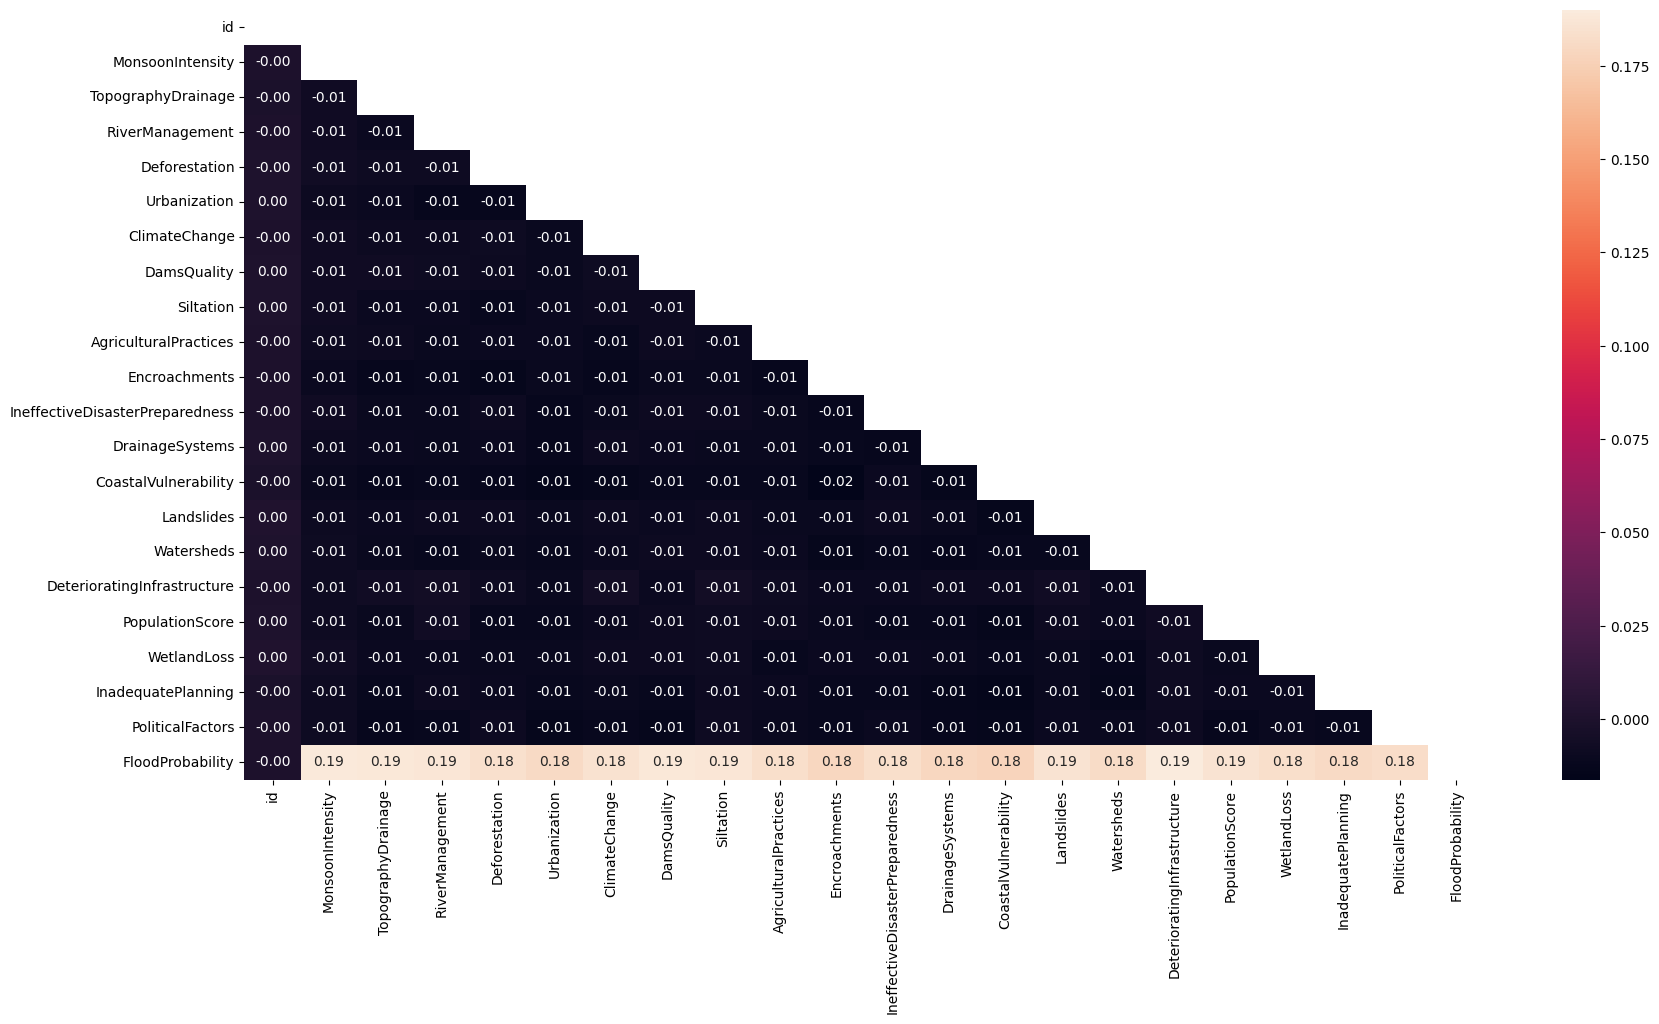

In [105]:
#PLOTTING THE HEATMAP FOR CHECKING THE COLLINEARITY
plt.figure(figsize=(20,10))
mask=np.triu(corre)
sns.heatmap(corre,mask=mask,fmt='.2f',annot=True)
plt.show()

In [106]:
#VISUALISATION:
df1.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

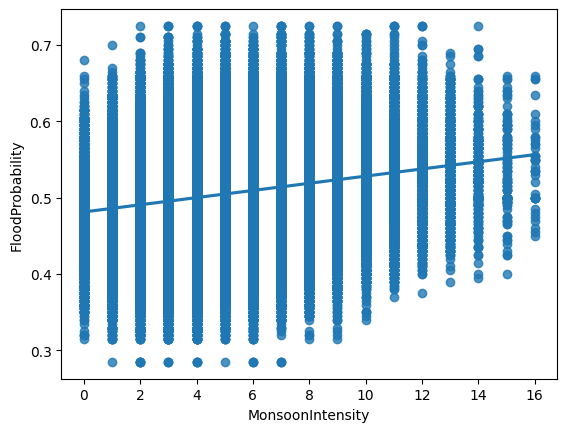

In [15]:
columns=['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors']
#SCATTER PLOT TO SHOW HOW THE DEPENDENT VARIABLE CHANGES WITH INDEPENDENT VARIABLE.
sns.regplot(x=df["MonsoonIntensity"],y=df["FloodProbability"])
plt.show()

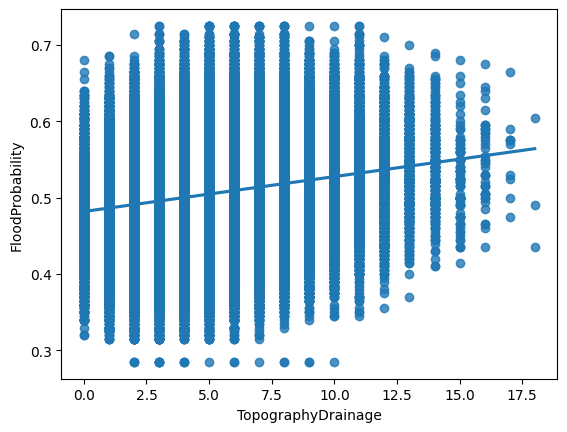

In [16]:
sns.regplot(x=df['TopographyDrainage'],y=df["FloodProbability"])
plt.show()

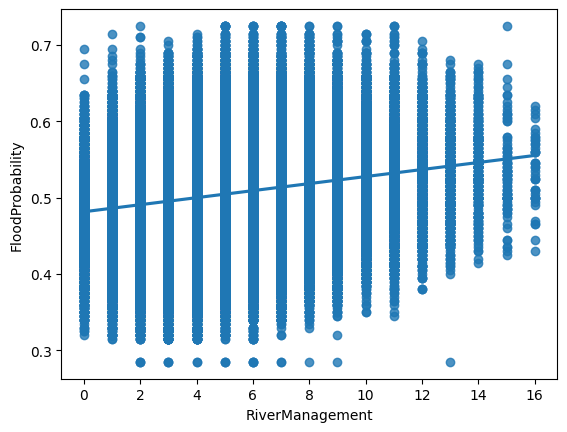

In [17]:
sns.regplot(x=df['RiverManagement'],y=df["FloodProbability"])
plt.show()

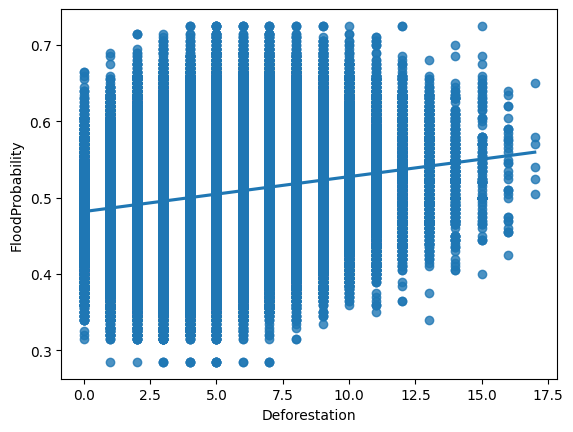

In [18]:
sns.regplot(x=df['Deforestation'],y=df["FloodProbability"])
plt.show()

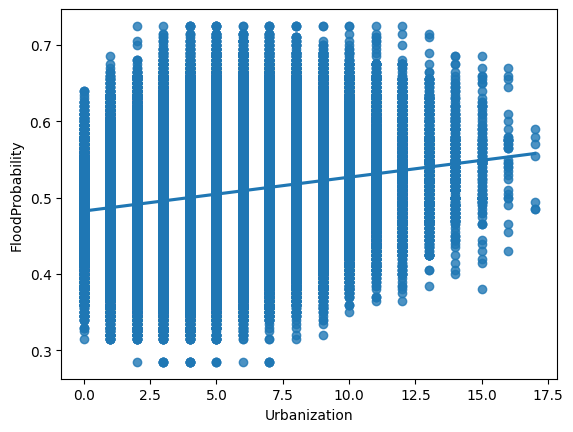

In [15]:
sns.regplot(x=df['Urbanization'],y=df["FloodProbability"])
plt.show()

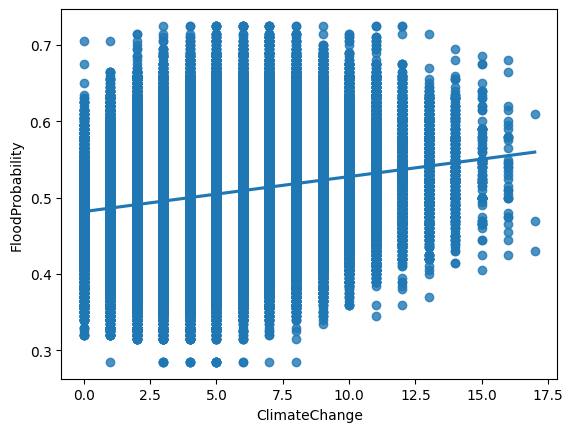

In [16]:
sns.regplot(x=df['ClimateChange'],y=df["FloodProbability"])
plt.show()

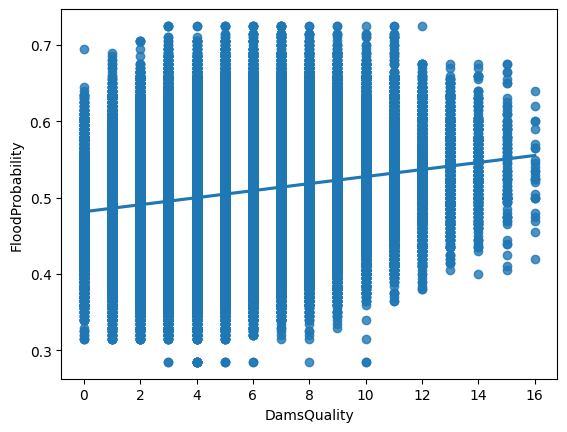

In [17]:
sns.regplot(x=df[ 'DamsQuality'],y=df["FloodProbability"])
plt.show()

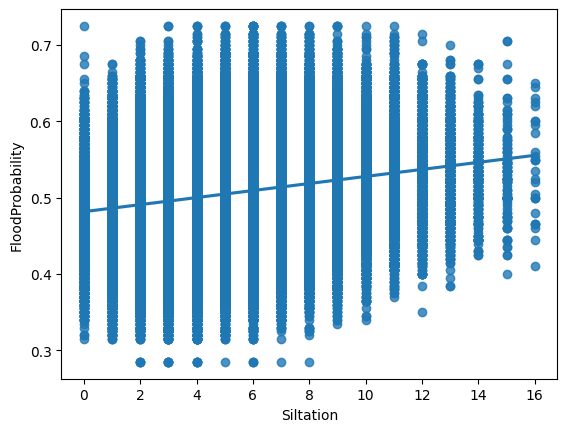

In [13]:
sns.regplot(x=df[ 'Siltation'],y=df["FloodProbability"])
plt.show()

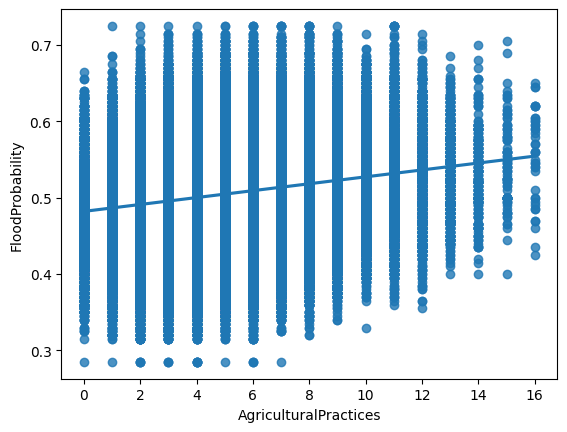

In [14]:
sns.regplot(x=df['AgriculturalPractices'],y=df["FloodProbability"])
plt.show()

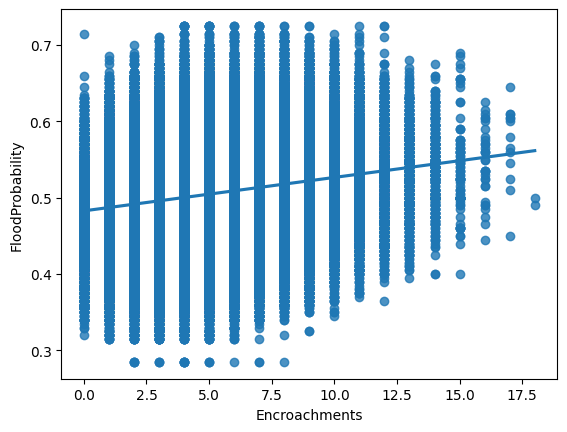

In [15]:
sns.regplot(x=df[ 'Encroachments'],y=df["FloodProbability"])
plt.show()

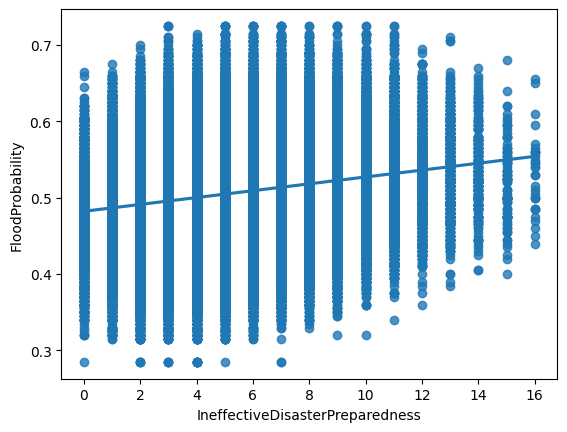

In [16]:
sns.regplot(x=df['IneffectiveDisasterPreparedness'],y=df["FloodProbability"])
plt.show()

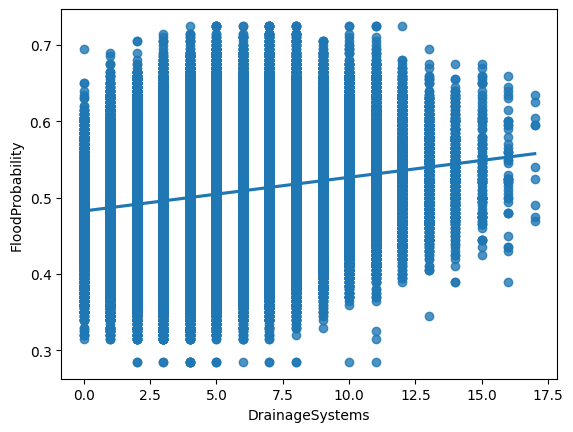

In [17]:
sns.regplot(x=df[ 'DrainageSystems'],y=df["FloodProbability"])
plt.show()

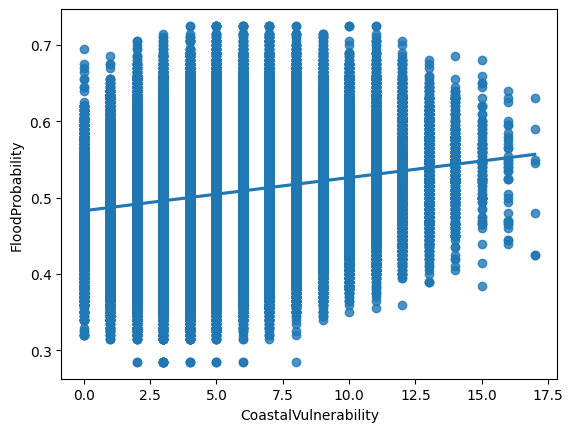

In [18]:
sns.regplot(x=df['CoastalVulnerability'],y=df["FloodProbability"])
plt.show()

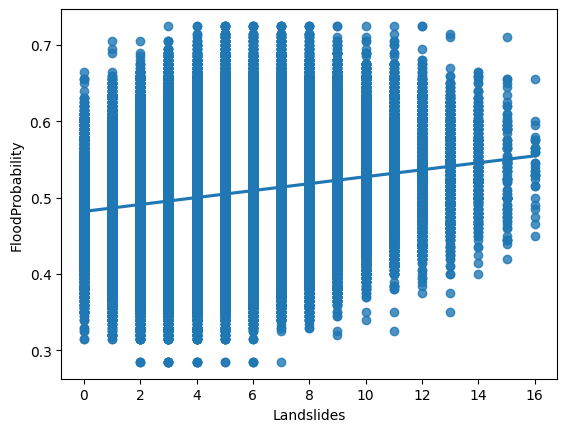

In [19]:
sns.regplot(x=df[ 'Landslides'],y=df["FloodProbability"])
plt.show()

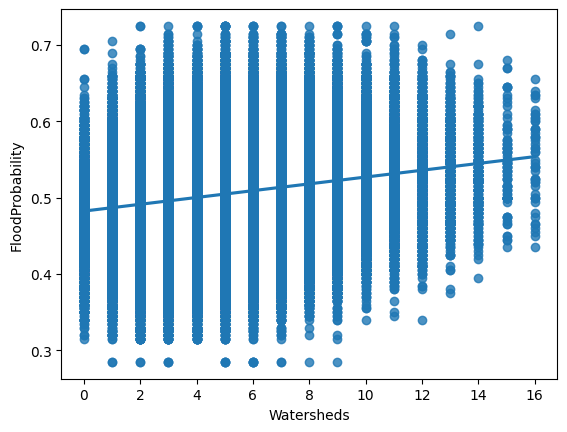

In [20]:
sns.regplot(x=df['Watersheds'],y=df["FloodProbability"])
plt.show()

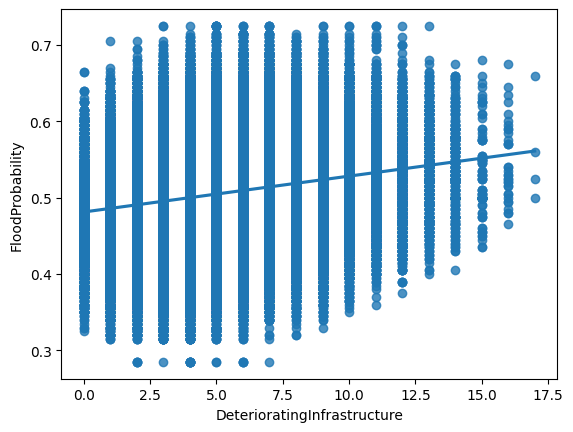

In [21]:
sns.regplot(x=df['DeterioratingInfrastructure'],y=df["FloodProbability"])
plt.show()

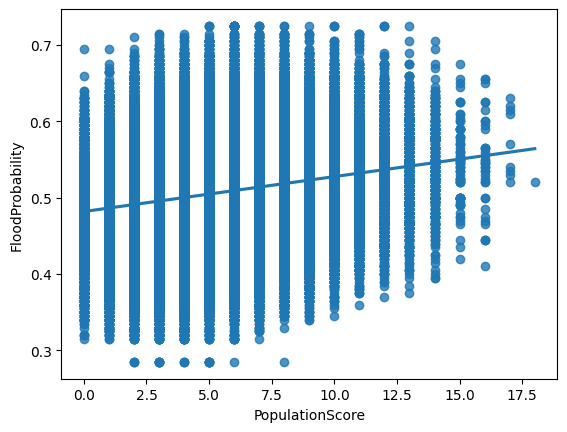

In [22]:
sns.regplot(x=df[ 'PopulationScore'],y=df["FloodProbability"])
plt.show()

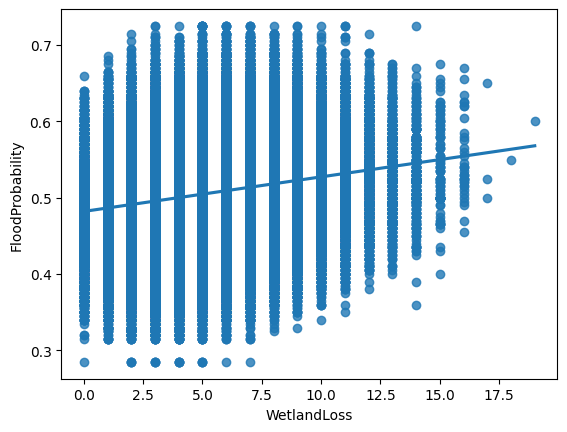

In [23]:
sns.regplot(x=df[ 'WetlandLoss'],y=df["FloodProbability"])
plt.show()

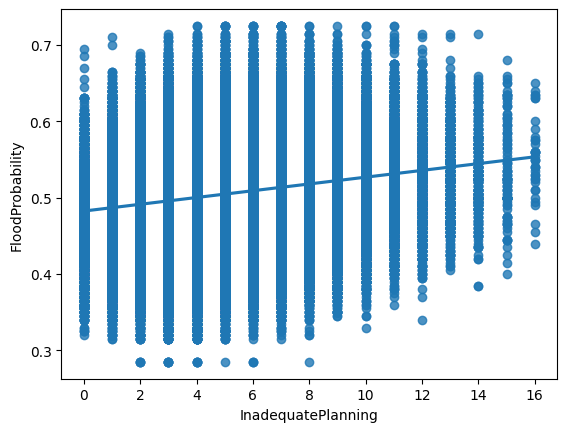

In [24]:
sns.regplot(x=df['InadequatePlanning'],y=df["FloodProbability"])
plt.show()

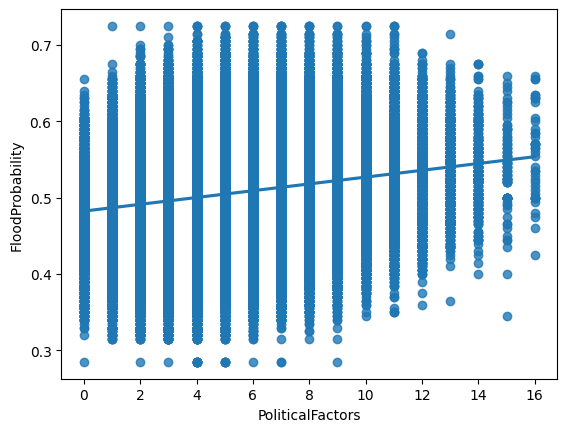

In [25]:
sns.regplot(x=df[ 'PoliticalFactors'],y=df["FloodProbability"])
plt.show()

In [107]:
#MODEL BUILDING STARTS
x=df.drop(["FloodProbability"],axis=1)
y=df["FloodProbability"]

In [108]:
#SPLITTING TRAINING AND TESTING DATA
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [109]:
from sklearn.linear_model import LinearRegression


In [110]:
SC=StandardScaler()
xtrain=SC.fit_transform(xtrain)
xtest=SC.transform(xtest)

In [111]:
model1=LinearRegression()

In [112]:
model1.fit(xtrain,ytrain)

LinearRegression()

In [113]:
#TRAINING SCORE 
model1.score(xtrain,ytrain)

0.8448859732527856

In [114]:
ypred=model1.predict(xtest)
ypred

array([0.50559195, 0.5676377 , 0.51673667, ..., 0.46587113, 0.49438283,
       0.47168296])

In [115]:
#TESTING SCORE
model1.score(xtest,ytest)

0.8452038520968255

In [116]:
#CHECKING ACCURACY
mse=mean_squared_error(ypred,ytest)
mse



0.00040219052231240055

In [117]:
#THE SCORE IS PRETTY MUCH LESS NEAR TO ZERO, SO MY MODEL HAS A GOOD ACCURACY

In [118]:
r2_scorings=r2_score(ypred,ytest)
r2_scorings


0.8170524014864313

In [119]:
#THE R2_SCORE IS MORE THAN 80% WHICH IS PRETTY MUCH GOOD.

In [120]:
#PREDICTING FLOOD PROBABILITY BASED ON TEST DATA


In [121]:
df2=pd.read_csv("C:\\Users\\trigo\\Downloads\\test data\\test.csv")
df2

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745300,1863257,5,4,8,3,5,4,4,5,5,...,5,6,1,3,5,6,4,4,6,6
745301,1863258,4,4,2,12,4,3,4,3,5,...,3,7,4,4,3,5,5,3,5,4
745302,1863259,5,7,9,5,5,6,7,5,5,...,6,11,3,11,4,5,9,5,5,4
745303,1863260,4,7,6,3,5,2,3,8,6,...,6,6,8,6,2,3,8,7,5,5


In [122]:
df2.isnull().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
dtype: int64

In [126]:
x=np.array(df2)

In [127]:
floodpred=model1.predict(x)
floodpred

array([12.20424765, 11.95765124, 11.95721206, ..., 19.24097812,
       19.08980195, 19.00738187])

In [128]:
df2["FLOOD PRED PROBABILITY"]=floodpred

In [129]:
df2

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FLOOD PRED PROBABILITY
0,1117957,4,6,3,5,6,7,8,7,8,...,5,7,5,6,3,6,4,4,5,12.204248
1,1117958,4,4,2,9,5,5,4,7,5,...,4,7,4,5,1,7,4,4,3,11.957651
2,1117959,1,3,6,5,7,2,4,6,4,...,9,2,5,5,2,3,6,8,3,11.957212
3,1117960,2,4,4,6,4,5,4,3,4,...,8,4,6,7,6,4,2,4,4,11.980861
4,1117961,6,3,2,4,6,4,5,5,3,...,3,2,6,4,6,8,4,5,5,11.980428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745300,1863257,5,4,8,3,5,4,4,5,5,...,6,1,3,5,6,4,4,6,6,18.935802
745301,1863258,4,4,2,12,4,3,4,3,5,...,7,4,4,3,5,5,3,5,4,18.877141
745302,1863259,5,7,9,5,5,6,7,5,5,...,11,3,11,4,5,9,5,5,4,19.240978
745303,1863260,4,7,6,3,5,2,3,8,6,...,6,8,6,2,3,8,7,5,5,19.089802


In [131]:
#SAMPLE SUBMISSION DATA
df3=df2[["id","FLOOD PRED PROBABILITY"]]
df3

,id,FLOOD PRED PROBABILITY
0,1117957,12.204248
1,1117958,11.957651
2,1117959,11.957212
3,1117960,11.980861
4,1117961,11.980428
...,...,...
745300,1863257,18.935802
745301,1863258,18.877141
745302,1863259,19.240978
745303,1863260,19.089802
